# MNIST Using Convolutional Neural Network

## Importing the libraries

In [13]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

## Adjusting the data

In [14]:
# Parameters for the model and dataset.
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Modelo para treino + Amostras: ", x_train.shape)
print("Amostras de treino: ", x_train.shape[0])
print("Amostras de teste: ", x_test.shape[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Modelo para treino + Amostras:  (60000, 28, 28, 1)
Amostras de treino:  60000
Amostras de teste:  10000


## Building the model

In [15]:
convnet = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(96, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.6),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

convnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 96)          55392     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 1, 96)         

## Training the model

In [16]:
batch_size = 256
epochs = 25

convnet.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

convnet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
211/211 [==============================] - 11s 48ms/step - loss: 0.7379 - accuracy: 0.7694 - val_loss: 0.1411 - val_accuracy: 0.9602
Epoch 2/25
211/211 [==============================] - 10s 49ms/step - loss: 0.2735 - accuracy: 0.9188 - val_loss: 0.0961 - val_accuracy: 0.9735
Epoch 3/25
211/211 [==============================] - 12s 55ms/step - loss: 0.2074 - accuracy: 0.9391 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 4/25
211/211 [==============================] - 14s 66ms/step - loss: 0.1691 - accuracy: 0.9497 - val_loss: 0.0678 - val_accuracy: 0.9812
Epoch 5/25
211/211 [==============================] - 14s 64ms/step - loss: 0.1552 - accuracy: 0.9551 - val_loss: 0.0579 - val_accuracy: 0.9833
Epoch 6/25
211/211 [==============================] - 13s 64ms/step - loss: 0.1376 - accuracy: 0.9608 - val_loss: 0.0566 - val_accuracy: 0.9828
Epoch 7/25
211/211 [==============================] - 14s 65ms/step - loss: 0.1281 - accuracy: 0.9629 - val_loss: 0.0510 - val_accuracy:

## Visualizing the results

In [17]:
score = convnet.evaluate(x_test, y_test, verbose=0)
print("Taxa de perda do set de teste: ", score[0])
print("Taxa de acurácia: ", score[1])

Taxa de perda do set de teste:  0.04064019024372101
Taxa de acurácia:  0.9882000088691711


313/313 [==============================] - 2s 5ms/step


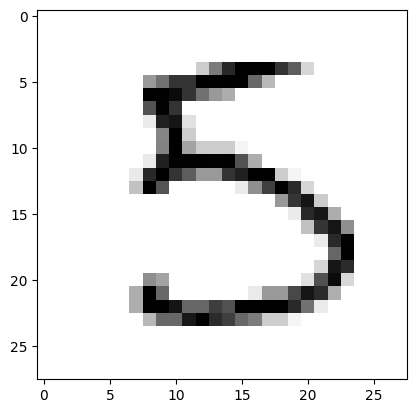

In [18]:
predictions = convnet.predict(x_test)

plt.imshow(x_test[15], cmap=plt.cm.binary)
plt.show()